## Purpose

This notebook is a symbolic interpretation of the antisymmetric wavefunction, as opposed to purely numeric as is done in 1d-2-non-interacting.

In [1]:
from sympy import symbols, sin, sqrt, pi, simplify
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

```
return 2 / self.length * sin(na * pi * xa / self.length) * sin(nb * pi * xb / self.length)
```

In [10]:
class TwoNonInteractingInABox:
    """
    This class models two non-interacting particles in a one dimensional box.
    """
    
    def __init__(self, length=1):
        """
        Mass and length can be in whatever units you like, but
        make sure these units are consistent with each other
        to give meaningful results.
        
        This class assumes the mass of each particle is the same.
        
        Parameters
        ----------            
        length: float
            The length of the one-dimensional box
        """
        self.length = length
    
    def wavefunction(self, na_val, nb_val, xa_val, xb_val):
        """
        Returns the value of the wavefunction of the two non-interacting
        particles.
        
        For xa and xb:
        
        0 < xa < self.length
        0 < xb < self.length
        
        Parameters
        ----------
        na: int
            The quantum number of particle a.
        
        nb: int
            The quantum number of particle b.
            
        xa: float
            The position of particle a.
        
        xb: float
            The position of particle b.
        
        Returns
        -------
        float
            value of the wavefunction.
        """
        l, na, xa, nb, xb = symbols('l na xa nb xb')
        psi = 2 / l * sin(na * pi * xa / l) * sin(nb * pi * xb / l)
        return psi.subs({'na': na_val, 'xa': xa_val, 'nb': nb_val, 'xb': xb_val, 'l': self.length})
    
    def symmetric(self, na, nb, xa, xb):
        """
        Returns the value symmetric wavefunction of the two non-interacting
        particles.
        
        na: int
            Quantum number of particle a.
            
        nb: int
            Quantum number of particle b.
            
        xa: float
            Position of particle a.
            
        xb: float
            Position of particle b
            
        Returns
        -------
        float
            Value of the symmetric wavefunction
        """
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) + self.wavefunction(nb, na, xa, xb))
    
    def antisymmetric(self, na, nb, xa, xb):
        """
        Returns the value antisymmetric wavefunction of the two non-interacting
        particles.
        
        na: int
            Quantum number of particle a.
            
        nb: int
            Quantum number of particle b.
            
        xa: float
            Position of particle a.
            
        xb: float
            Position of particle b
            
        Returns
        -------
        float
            Value of the antisymmetric wavefunction
        """
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) - self.wavefunction(nb, na, xa, xb))
    
    def prob_density(self, na, nb, symmetric=True, points=10):
        """
        Returns all the arrays to plot surface or contour plots of the 
        probability density as a function of xa and xb (the positions of
        each particle).
        
        Parameters
        ----------
        na: int
            Quantum number of particle a
            
        nb: int
            Quantum number of particle b
            
        symmetric: bool
            True if the symmetric probability density is needed. False if the
            antisymmetric desnity is needed.
        
        points: int
            How many points along each axis to sample on the surface.
        
        Returns
        -------
        np.array, np.array, np.array
            First array is the 1d array of xa points. Second array is 1d array of
            xb points. Third array is two dimensional array of probability density
            at the intersection of the positions of the two particles.
        """
        xas = np.linspace(0.0, self.length, points)
        xbs = np.linspace(0.0, self.length, points)
        zs = np.zeros((points, points), np.float64)
        for ixa, xa in enumerate(xas):
            for ixb, xb in enumerate(xbs):
                if symmetric:
                    zs[ixa, ixb] = (self.symmetric(na, nb, xa, xb) ** 2).evalf()
                else:
                    zs[ixa, ixb] = (self.antisymmetric(na, nb, xa, xb) ** 2).evalf()
        return xas, xbs, zs

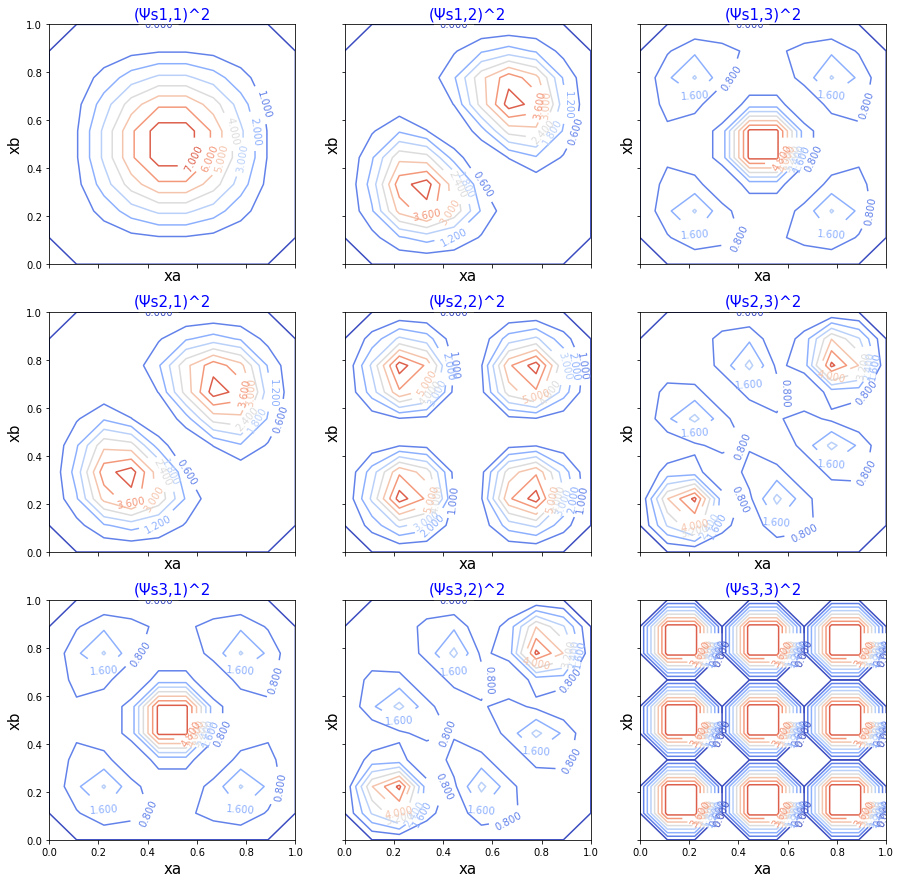

In [11]:
box = TwoNonInteractingInABox(length=1.0)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True, sharey=True)
nas = [1, 2, 3]
nbs = [1, 2, 3]
for ina, na in enumerate(nas):
    for inb, nb in enumerate(nbs):
        xas, xbs, zs = box.prob_density(na=na, nb=nb, symmetric=True)
        xs, ys = np.meshgrid(xas, xbs)
        ax = axs[ina, inb]
        ax.set_xlabel('xa', size=15)
        ax.set_ylabel('xb', size=15)
        ax.set_title(f'(Ψs{na},{nb})^2', size=15, color='b')
        cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)
        ax.clabel(cs, inline=True, fontsize=10)

<ipython-input-12-ed044d762689>:13: UserWarning: No contour levels were found within the data range.
  cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)


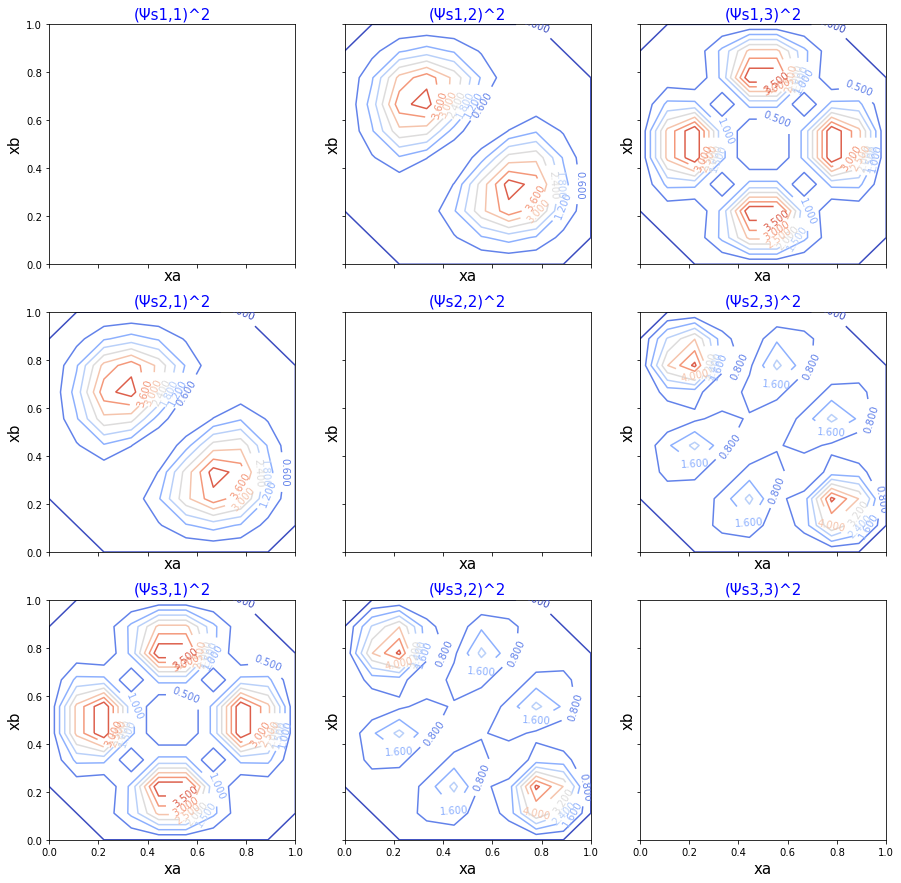

In [12]:
box = TwoNonInteractingInABox(length=1.0)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True, sharey=True)
nas = [1, 2, 3]
nbs = [1, 2, 3]
for ina, na in enumerate(nas):
    for inb, nb in enumerate(nbs):
        xas, xbs, zs = box.prob_density(na=na, nb=nb, symmetric=False)
        xs, ys = np.meshgrid(xas, xbs)
        ax = axs[ina, inb]
        ax.set_xlabel('xa', size=15)
        ax.set_ylabel('xb', size=15)
        ax.set_title(f'(Ψs{na},{nb})^2', size=15, color='b')
        cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)
        ax.clabel(cs, inline=True, fontsize=10)